In [1]:
# Importing Python Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from math import sqrt
from xgboost import plot_tree
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

## Store Dataset Exploration

In [2]:
# Storing the store dataset in a python variable
df_store = pd.read_csv('store.csv')

In [3]:
df_store.head(5) # To view the dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
df_store.shape # shape of the store dataset

(1115, 10)

In [6]:
df_store.describe() #Statistics about the dataset

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
df_store.dtypes #Checking the data-types

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [8]:
df_store.isnull().sum() # Checking for null values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

## Train Dataset Exploration

In [10]:
# Storing the Train dataset in a python variable
df_train = pd.read_csv('train.csv', low_memory=False)

In [11]:
df_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
df_train.shape # shape of the train dataset

(1017209, 9)

In [14]:
df_train.describe() #Statistics about the dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
df_train.dtypes #Checking the data-types

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [16]:
df_train.isnull().sum() # Checking for null values

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

{'Mean': 5774.125500046699, 'Median': 5744.0}

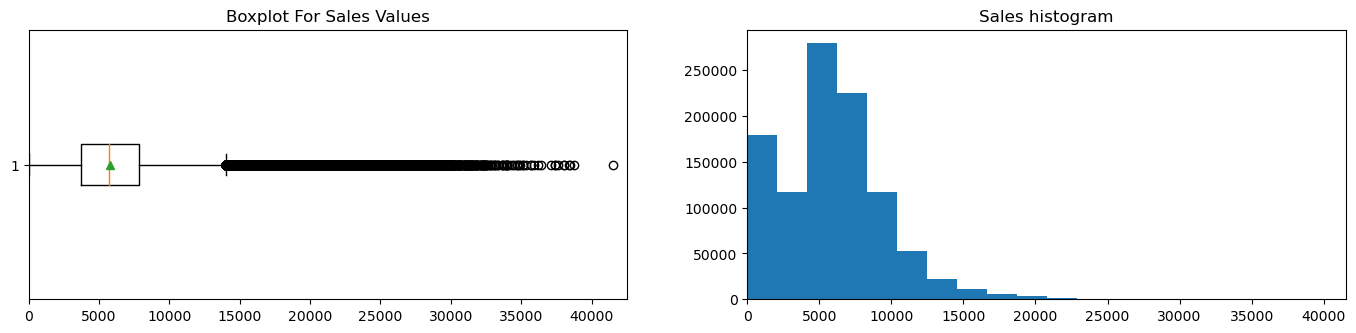

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}

{'Mean': 633.1795517890587, 'Median': 609.0}

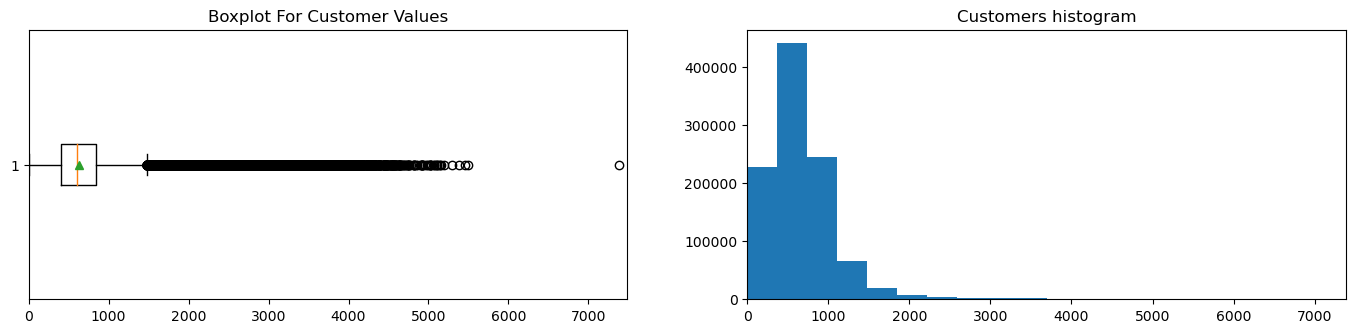

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

In [20]:
#stats.pearsonr(df_train.Customers, df_train.Sales)[0]

## Test Dataset Exploration

In [21]:
df_test=pd.read_csv('test.csv')
test=pd.read_csv('test.csv')

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [23]:
df_test.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [24]:
df_test.shape # shape of the test dataset

(41088, 9)

In [25]:
df_test.describe() #Statistics about the dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,0.0,0.0,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,NaN,NaN,0.854322,0.395833,0.443487
std,320.274496,2.015481,NaN,NaN,0.352787,0.489035,0.496802
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,279.750000,2.000000,NaN,NaN,1.000000,0.000000,0.000000
50%,553.500000,4.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,832.250000,6.000000,NaN,NaN,1.000000,1.000000,1.000000
max,1115.000000,7.000000,NaN,NaN,1.000000,1.000000,1.000000


In [26]:
df_test.dtypes #Checking the data-types

Store              int64
DayOfWeek          int64
Date              object
Sales            float64
Customers        float64
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [27]:
df_test.isnull().sum() # Checking for null values

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

## Merging Store & Train
Dataset

In [28]:
df = pd.merge(df_store,df_train,how = "inner",on = "Store")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017155 entries, 0 to 1017154
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017155 non-null  int64  
 1   StoreType                  1017155 non-null  object 
 2   Assortment                 1017155 non-null  object 
 3   CompetitionDistance        1014513 non-null  float64
 4   CompetitionOpenSinceMonth  693826 non-null   float64
 5   CompetitionOpenSinceYear   693826 non-null   float64
 6   Promo2                     1017155 non-null  int64  
 7   Promo2SinceWeek            509139 non-null   float64
 8   Promo2SinceYear            509139 non-null   float64
 9   PromoInterval              509139 non-null   object 
 10  DayOfWeek                  1017155 non-null  int64  
 11  Date                       1017155 non-null  object 
 12  Sales                      1017155 non-null  int64  
 13  Customers   

In [30]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017155e+06,1.014513e+06,693826.000000,693826.000000,1.017155e+06,509139.000000,509139.000000,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06
mean,5.584284e+02,5.430231e+03,7.222835,2008.690232,5.005520e-01,23.269714,2011.752700,3.998356e+00,5.774126e+03,6.331796e+02,8.300977e-01,3.815141e-01,1.786444e-01
std,3.219078e+02,7.715433e+03,3.211810,5.992658,4.999999e-01,14.096037,1.662857,1.997420e+00,3.849799e+03,4.644012e+02,3.755472e-01,4.857585e-01,3.830544e-01
min,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.000000e+00,3.728000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


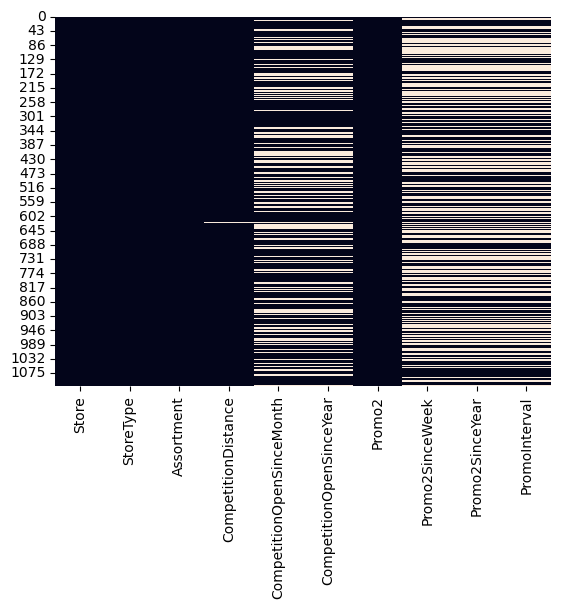

In [31]:
sns.heatmap(df_store.isnull(), cbar = False);

In [32]:
# The following Columns needs changes -
# CompetitionDistance
# CompetitionOpenSinceMonth
# CompetitionOpenSinceYear
# Promo2SinceWeek
# Promo2SinceYear
# PromoInterval

# To use a mean imputation data has to be numeric and not skewed.
# To use a median imputation data has to be numeric and skewed.

### CompetitionDistance

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

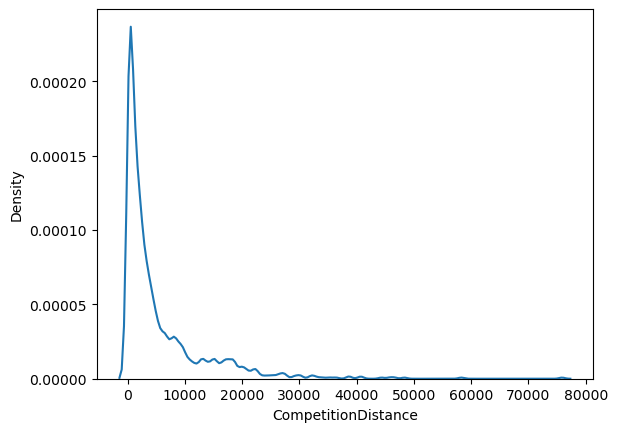

In [33]:
# CompetitionDistance
df['CompetitionDistance'].skew()
# 2.9285340174784116 - Data is positively skewed & Median imputation can be applied
# (since the mean is biased by those outliers)

sns.kdeplot(df['CompetitionDistance'])
# From KDE Plot we can verify data is positively skewed

In [34]:
# Replacing CompetitionDistance null values with median
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
df['CompetitionDistance'].isnull().sum()

0

In [35]:
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == 0)].count()[0]))
print ()

-But interestingly enough, 139610 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



### CompetitionOpenSinceMonth

<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='Density'>

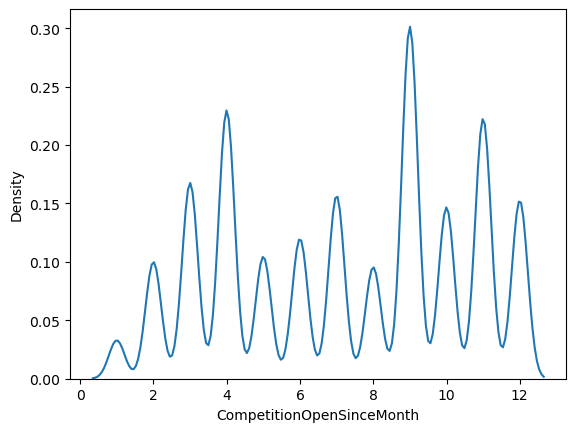

In [36]:
# CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'].skew()
# -0.16986163462865858

sns.kdeplot(df['CompetitionOpenSinceMonth'])
# Data is fairly symmetrical, both kde and skewness explains it.

{'Mean': 7.2247043363994745, 'Median': nan}

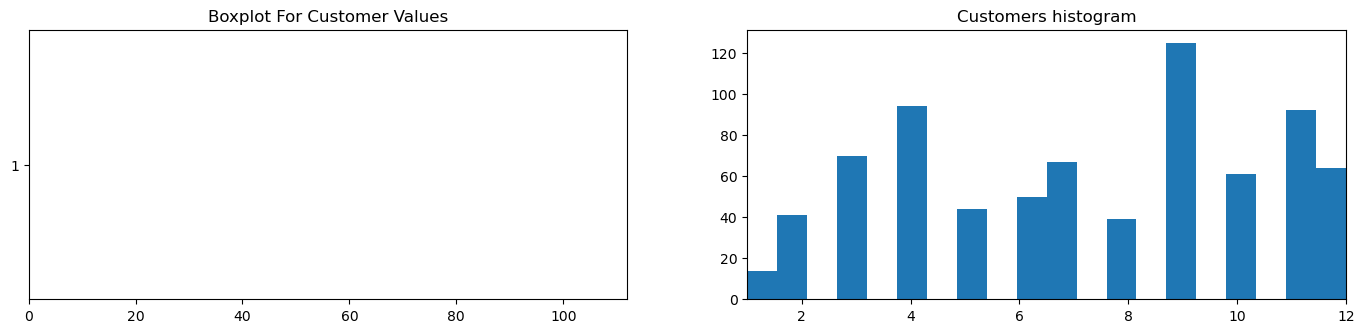

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store.CompetitionOpenSinceMonth, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_store["CompetitionOpenSinceMonth"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_store.CompetitionOpenSinceMonth, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_store.CompetitionOpenSinceMonth), max(df_store.CompetitionOpenSinceMonth)))

{"Mean":np.mean(df_store.CompetitionOpenSinceMonth),"Median":np.median(df_store.CompetitionOpenSinceMonth)}

In [38]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mean())
df['CompetitionOpenSinceMonth'].isnull().sum()

0

### CompetitionOpenSinceYear

<AxesSubplot:xlabel='CompetitionOpenSinceYear', ylabel='Density'>

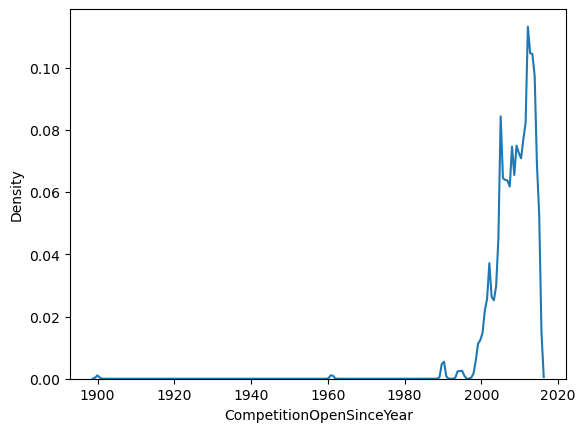

In [39]:
# CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'].skew()
# -0.16986163462865858

sns.kdeplot(df['CompetitionOpenSinceYear'])
# Data is fairly symmetrical, both kde and skewness explains it.

{'Mean': 2008.6688567674114, 'Median': nan}

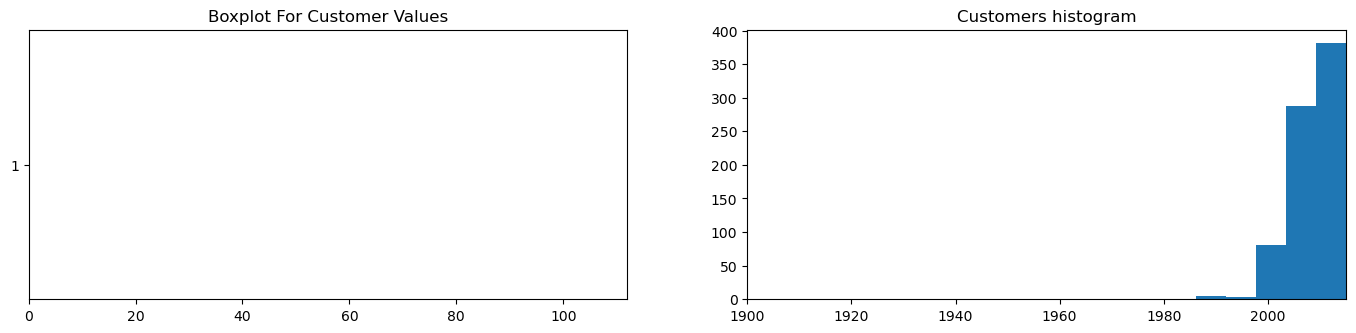

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store.CompetitionOpenSinceMonth, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_store["CompetitionOpenSinceMonth"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_store.CompetitionOpenSinceYear, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_store.CompetitionOpenSinceYear), max(df_store.CompetitionOpenSinceYear)))

{"Mean":np.mean(df_store.CompetitionOpenSinceYear),"Median":np.median(df_store.CompetitionOpenSinceYear)}

In [41]:
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mean())
df['CompetitionOpenSinceYear'].isnull().sum()

0

In [42]:
# This case is pretty straighforward, all the missing values comes from fields where Promo2=0 
# which means there are no continuous promotional activities for those stores.
# Having no promotion means those fields have to be 0 as well since they are linked to Promo2
df.Promo2SinceWeek.fillna(0,inplace=True)
df.Promo2SinceYear.fillna(0,inplace=True)
df.PromoInterval.fillna(0,inplace=True)

<AxesSubplot:xlabel='Promo2SinceWeek', ylabel='Density'>

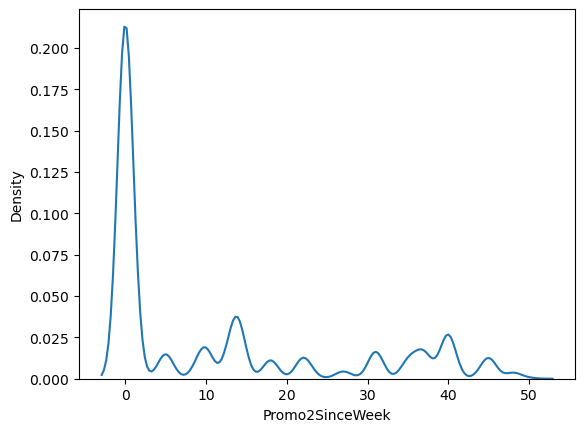

In [43]:
sns.kdeplot(df['Promo2SinceWeek'])

<AxesSubplot:xlabel='Promo2SinceYear', ylabel='Density'>

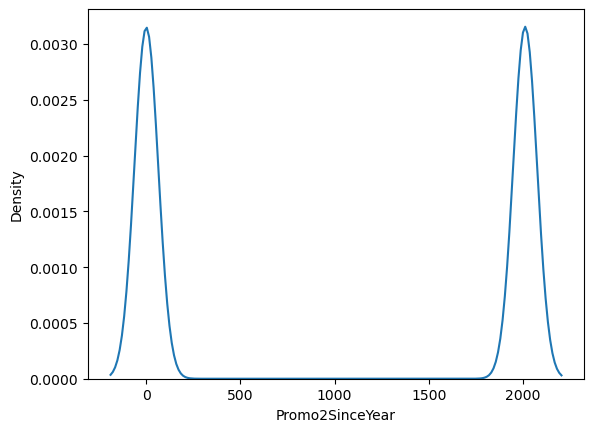

In [44]:
sns.kdeplot(df['Promo2SinceYear'])

<AxesSubplot:>

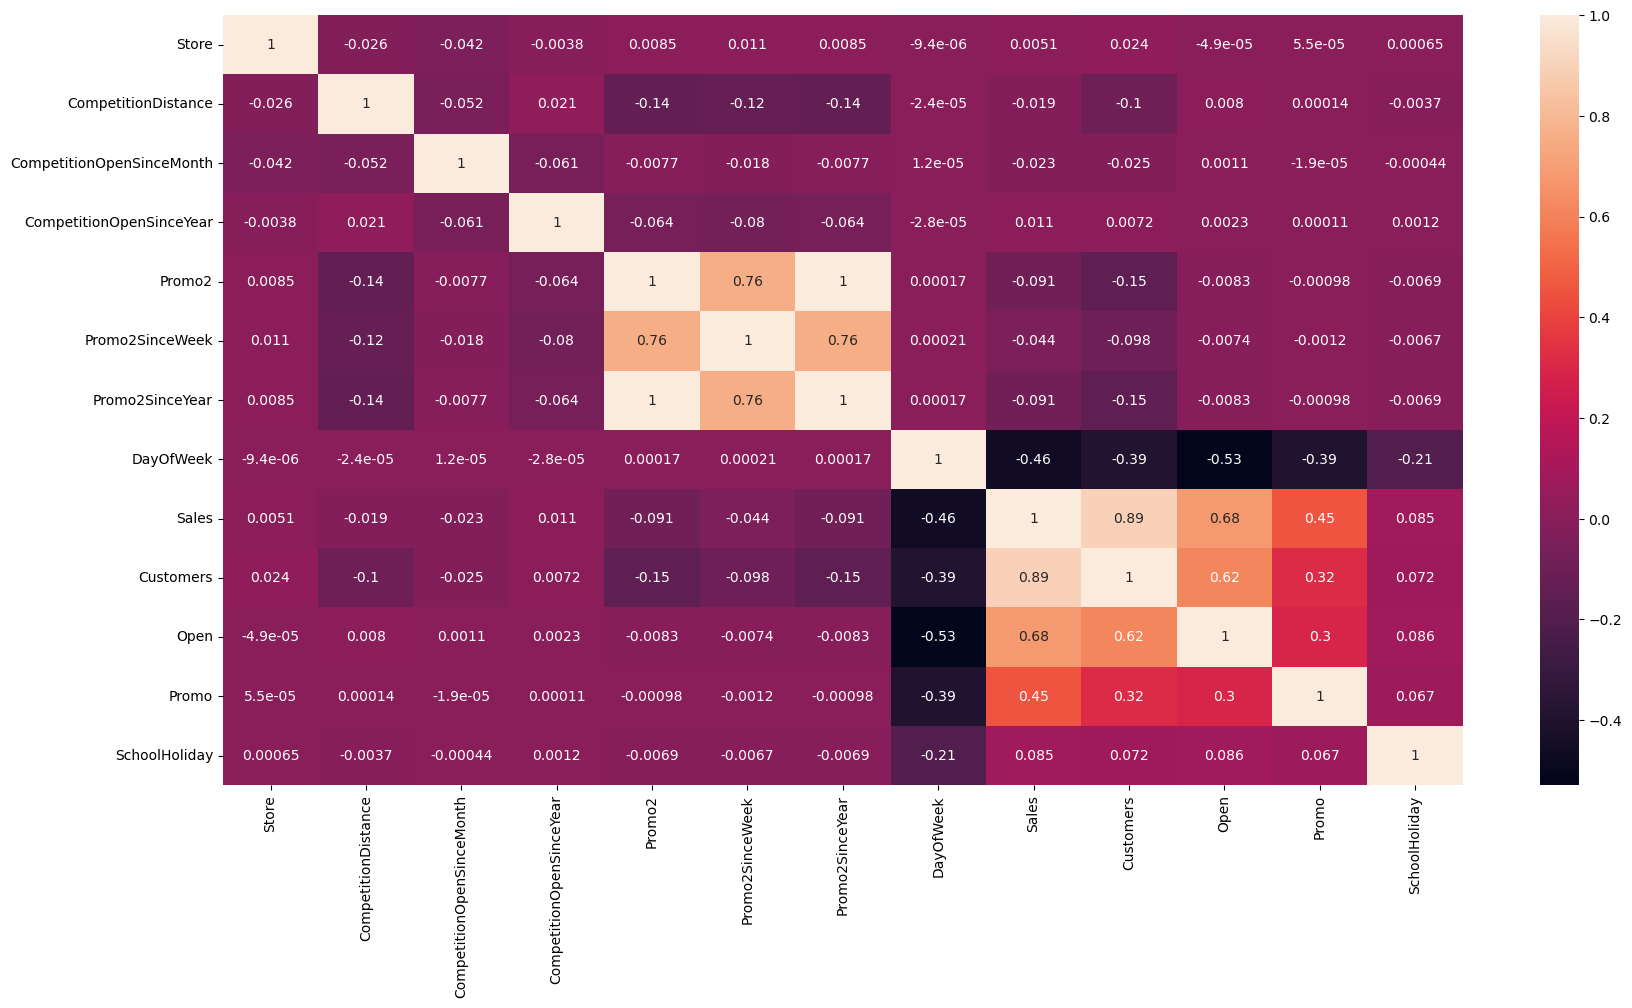

In [45]:
# Correlation Plot to see contribution of features
plt.figure(figsize=(20,10))
sns.heatmap(data = df.corr(),annot = True)
# Strong correlations between customers and sales , promo and sales, open and sales (obviously sales shoot up on open days only)

### Store Open/Close

In [46]:
df[df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [47]:
df = df[df.Open == 1].copy()

In [48]:
df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

## Store Analysis

In [49]:
# Open & Sales >0 stores
df_open = df[~((df.Open ==0) | (df.Sales==0))]
df_open

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.000000,2008.000000,0,0.0,0.0,0,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.000000,2008.000000,0,0.0,0.0,0,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.000000,2008.000000,0,0.0,0.0,0,3,29/07/2015,4782,523,1,1,0,1
3,1,c,a,1270.0,9.000000,2008.000000,0,0.0,0.0,0,2,28/07/2015,5011,560,1,1,0,1
4,1,c,a,1270.0,9.000000,2008.000000,0,0.0,0.0,0,1,27/07/2015,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017148,1115,d,c,5350.0,7.222835,2008.690232,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,07/01/2013,6905,471,1,1,0,1
1017150,1115,d,c,5350.0,7.222835,2008.690232,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,05/01/2013,4771,339,1,0,0,1
1017151,1115,d,c,5350.0,7.222835,2008.690232,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,04/01/2013,4540,326,1,0,0,1
1017152,1115,d,c,5350.0,7.222835,2008.690232,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,03/01/2013,4297,300,1,0,0,1


In [50]:
df['SalesPerCustomer']=df['Sales']/df['Customers'] # Adding new column

In [51]:
df.groupby('StoreType')['Customers', 'Sales', 'SalesPerCustomer'].sum().sort_values('Sales', ascending=False)

,Customers,Sales,SalesPerCustomer
StoreType,,,
a,363541431,3165334859,4.043129e+06
d,156904995,1765392943,2.918350e+06
c,92129705,783221426,9.744876e+05
b,31465616,159231395,7.987612e+04


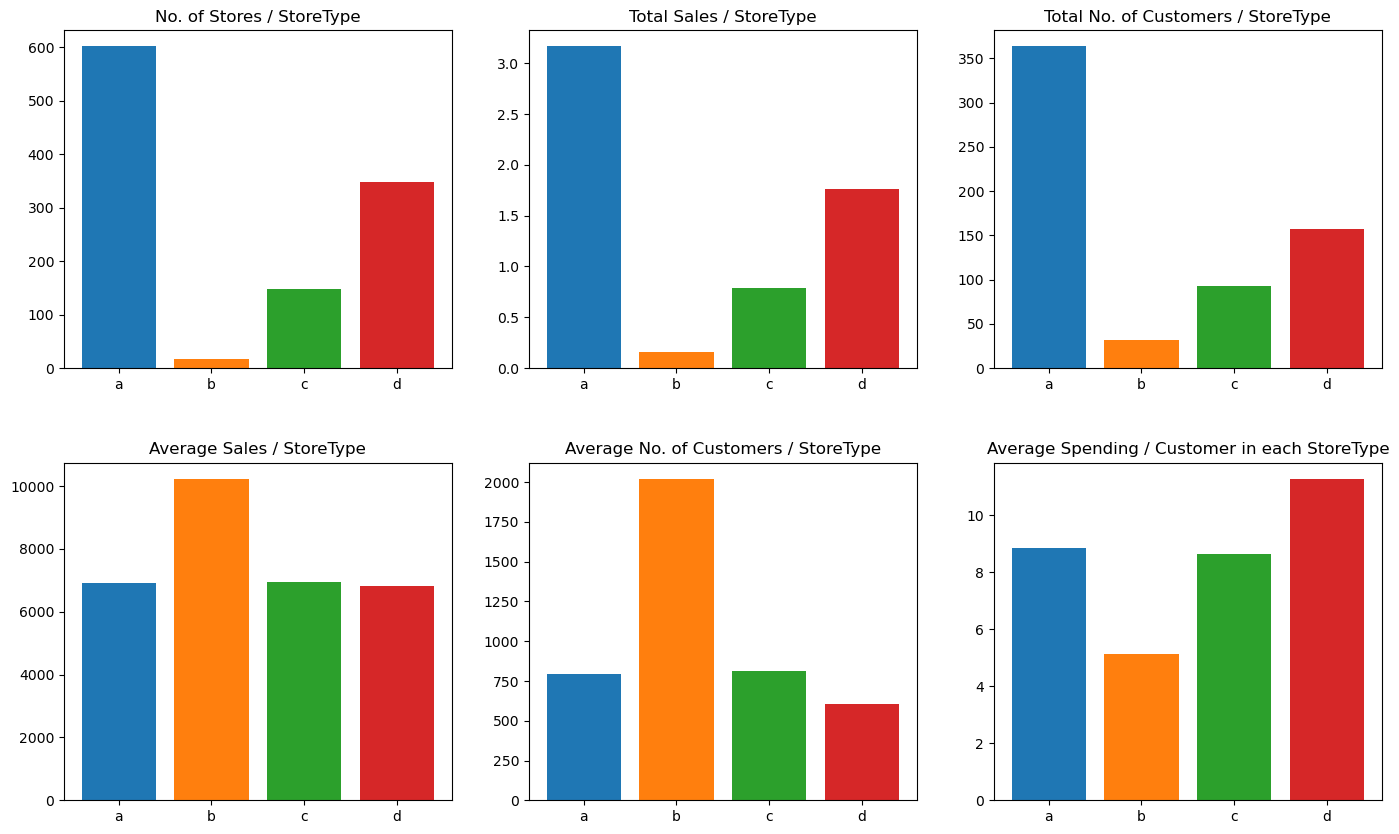

In [52]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)

axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("No. of Stores / StoreType")
axes[0,1].bar(df.groupby(by="StoreType").sum().Sales.index,df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales / StoreType")
axes[0,2].bar(df.groupby(by="StoreType").sum().Customers.index,df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total No. of Customers / StoreType")
axes[1,0].bar(df.groupby(by="StoreType").sum().Customers.index,df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales / StoreType")
axes[1,1].bar(df.groupby(by="StoreType").sum().Customers.index,df.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average No. of Customers / StoreType")
axes[1,2].bar(df.groupby(by="StoreType").sum().Sales.index,df.groupby(by="StoreType").SalesPerCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending / Customer in each StoreType")
plt.show()

<AxesSubplot:title={'center':'Avg sales per store'}, xlabel='Store', ylabel='Sales'>

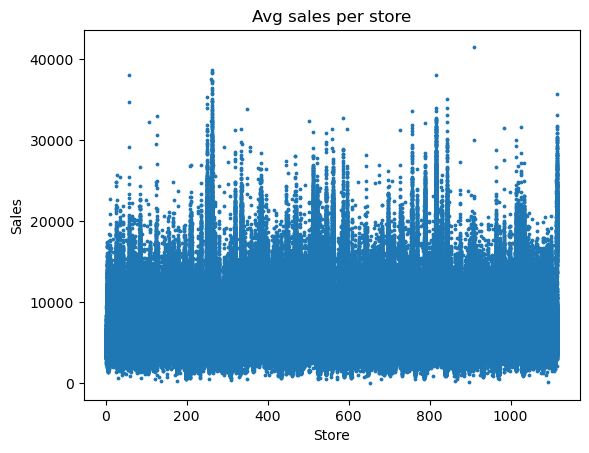

In [53]:
df.plot.scatter('Store','Sales',s=3,title='Avg sales per store')

In [54]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalesPerCustomer'],
      dtype='object')

In [55]:
# lest convert Date column and extract different parts of the date
def convert_date(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['Day']=df.Date.dt.day
    df['WeekOfYear']=df.Date.dt.isocalendar().week

In [56]:
convert_date(df)

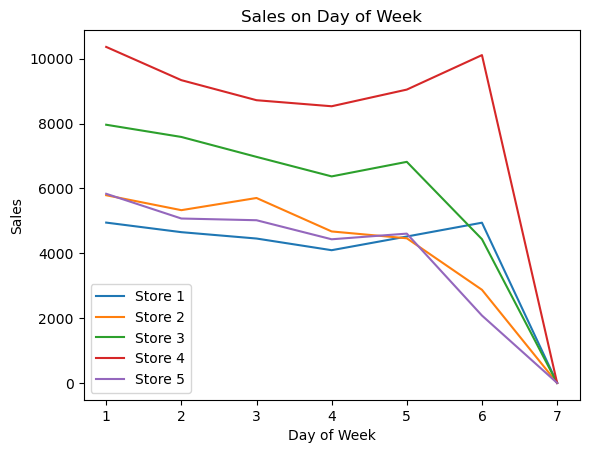

In [57]:
graph=df_train.groupby(['Store','DayOfWeek'],as_index=False).mean()
for store in df_train['Store'].unique()[:5]:
    temp=graph[graph['Store']==store]
    plt.plot(temp.DayOfWeek,temp.Sales,label=f"Store {store}")
    plt.legend()
    plt.xlabel('Day of Week')
    plt.ylabel('Sales')
    plt.title('Sales on Day of Week')

So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.


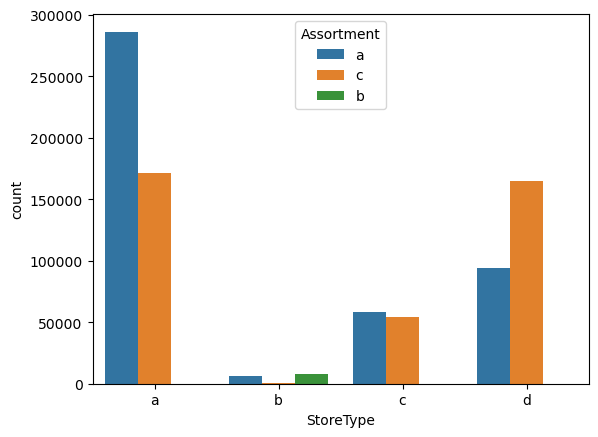

In [58]:
sns.countplot(data = df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
print("""So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.""")

plt.show()

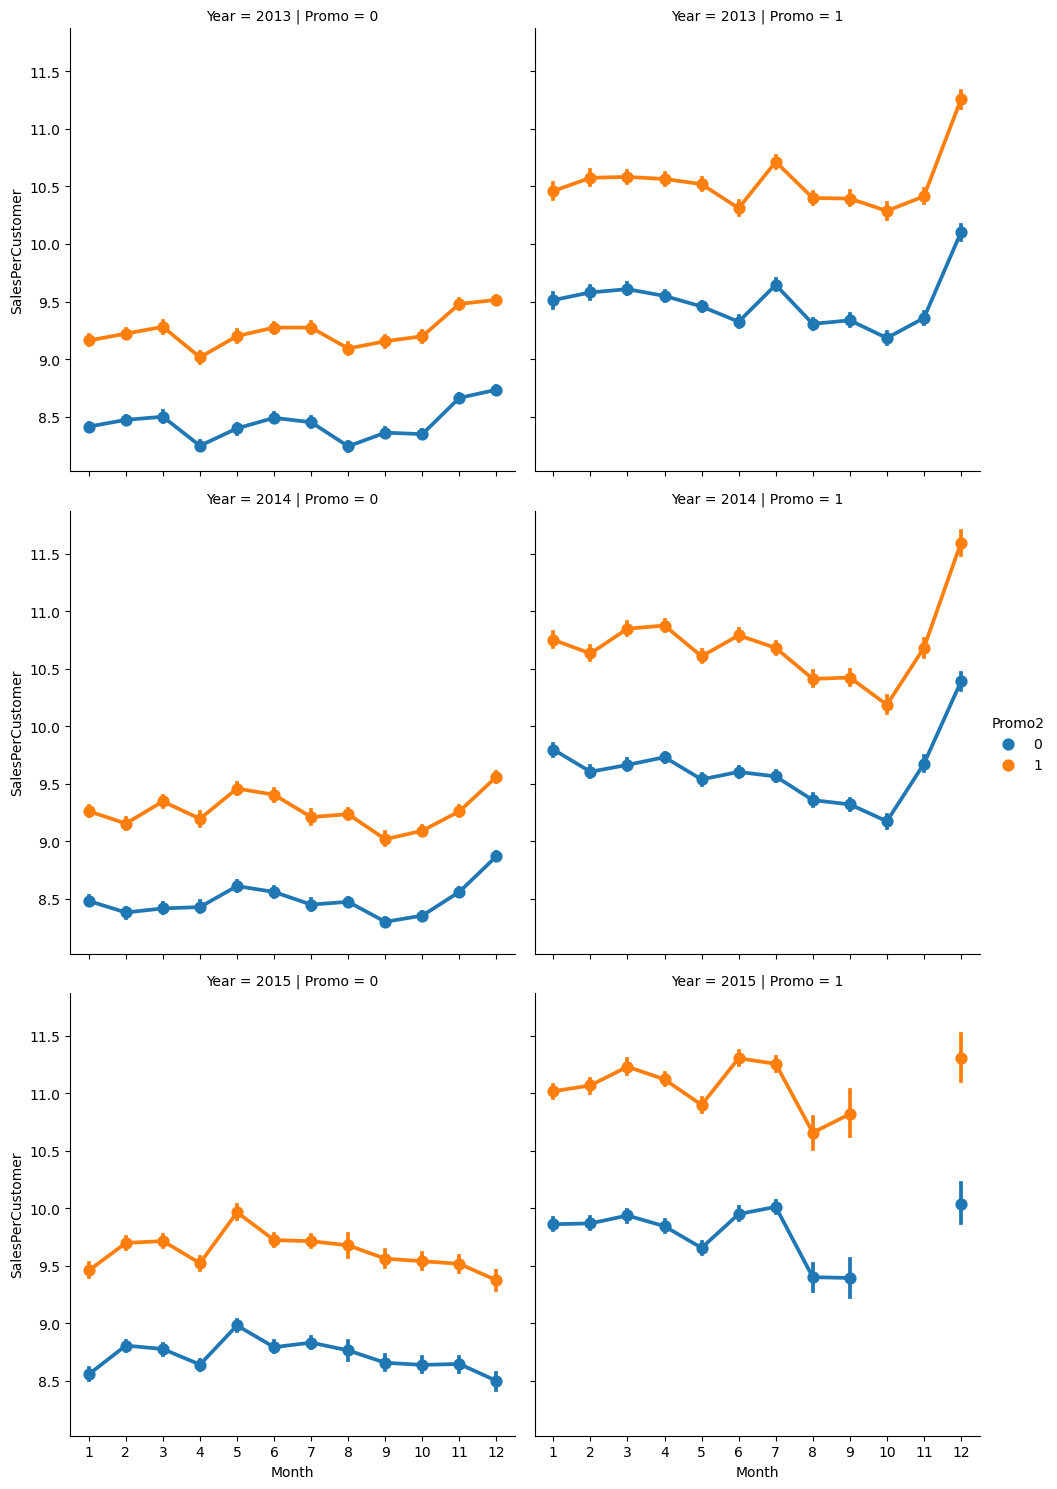

In [59]:
sns.factorplot(data = df, x='Month', y='SalesPerCustomer',
              col ='Promo', hue='Promo2', row='Year')

<AxesSubplot:xlabel='Date'>

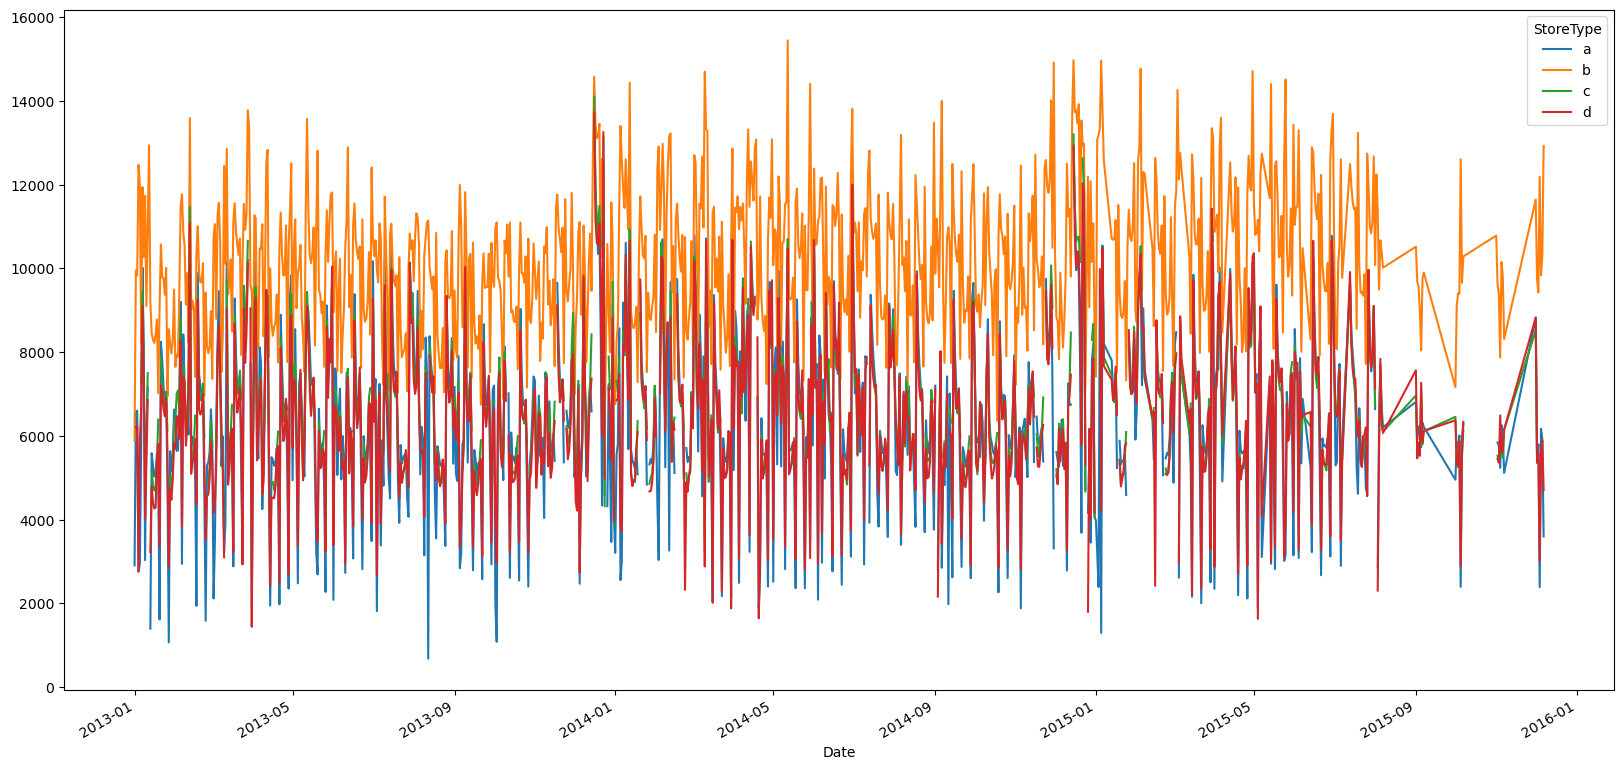

In [60]:
fig, ax = plt.subplots(figsize = (20,10))
df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

## XGBOOST Model Fitting

In [61]:
# Creating copy for modeling
xgboost_df = df.copy()

In [62]:
xgboost_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalesPerCustomer', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

In [63]:
# Dropping columns which are correlated (for better model accuracy)
xgboost_df = xgboost_df.drop(['Customers', 'SalesPerCustomer', 'PromoInterval'], axis=1)

In [64]:
# Combining similar columns into one column and dropping old columns
# CompetitionOpen
xgboost_df['CompetitionOpen'] = 12 * (xgboost_df.Year - xgboost_df.CompetitionOpenSinceYear) + (xgboost_df.Month - xgboost_df.CompetitionOpenSinceMonth)

In [65]:
# Dropping the not required columns
xgboost_df = xgboost_df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [66]:
# lest convert Date column and extract different parts of the date
xgboost_df['PromoOpen'] = 12 * (xgboost_df.Year - xgboost_df.Promo2SinceYear) + (xgboost_df.WeekOfYear - xgboost_df.Promo2SinceWeek) / 4.0

In [67]:
# Dropping columns as merged based on these two is created above
xgboost_df = xgboost_df.drop(["Promo2SinceWeek", "Promo2SinceYear"], axis = 1)

In [68]:
# Converting categorical cols to numerical cols and removing old cols
category = {0:0, "0": 0, "a": 1, "b": 1, "c": 1}
xgboost_df["StateHoliday_Cat"] = xgboost_df["StateHoliday"].map(category)
xgboost_df["StoreType_Cat"] = xgboost_df["StoreType"].map(category)
xgboost_df["Assortment_Cat"] = xgboost_df["Assortment"].map(category)
xgboost_df = xgboost_df.drop(["StateHoliday", "StoreType", "Assortment"], axis = 1) # dropping not required columns

In [69]:
del xgboost_df['Date']
del xgboost_df['WeekOfYear']

In [70]:
# Splitting the data
features = xgboost_df.drop(["Sales"], axis = 1)
target = xgboost_df["Sales"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.20) 

In [71]:
# Tuning parameters - using default metrics
params = {'max_depth':10, "booster": "gbtree", 'eta':0.3, 'objective':'reg:linear','enable_categorical':True} 

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost = xgb.train(params, dtrain, 100, evals=watchlist,early_stopping_rounds= 100, verbose_eval=True)
         
# Making predictions
preds = xgboost.predict(dtest)

[01:39:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical" } are not used.

[0]	train-rmse:5608.86494	eval-rmse:5614.09461
[1]	train-rmse:4273.03245	eval-rmse:4277.13325
[2]	train-rmse:3420.66066	eval-rmse:3423.62472
[3]	train-rmse:2883.17358	eval-rmse:2888.81155
[4]	train-rmse:2518.37469	eval-rmse:2527.29879
[5]	train-rmse:2319.33864	eval-rmse:2329.46857
[6]	train-rmse:2171.37148	eval-rmse:2185.76641
[7]	train-rmse:2093.15423	eval-rmse:2107.95346
[8]	train-rmse:2020.21633	eval-rmse:2036.19293
[9]	train-rmse:1970.87037	eval-rmse:1988.22152
[10]	train-rmse:1904.85675	eval-rmse:1925.24205
[11]	train-rmse:1882.99087	eval-rmse:1904.9

In [72]:
# RMSE of model
rms_xgboost = sqrt(mean_squared_error(y_test, preds))
print("Root Mean Squared Error for XGBoost:", rms_xgboost)

Root Mean Squared Error for XGBoost: 816.4637939273788


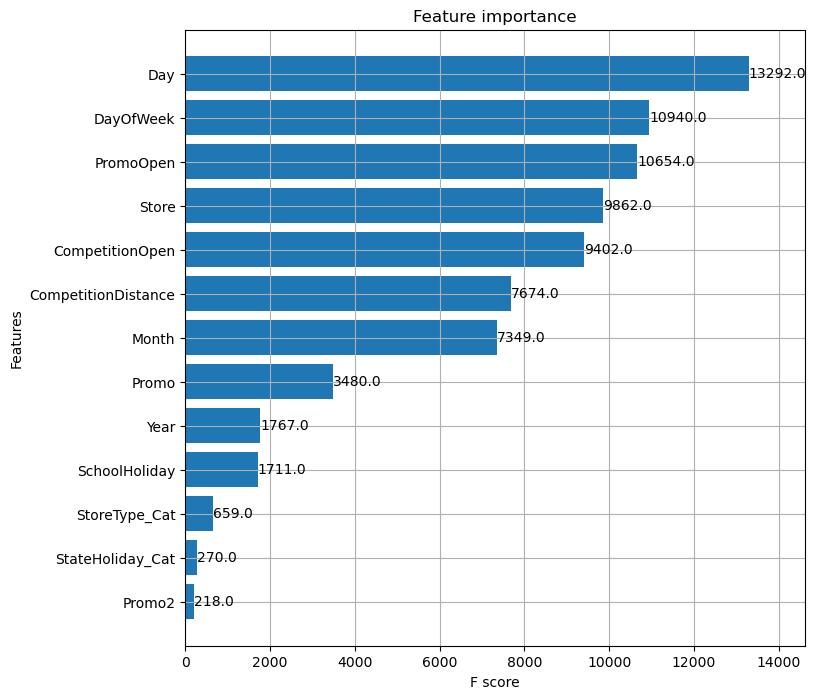

In [73]:
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [74]:
!pip install graphviz

In [75]:
rcParams['figure.figsize']=30,30


(process:24668): GLib-GIO-WARNING **: 01:40:10.673: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


<AxesSubplot:>

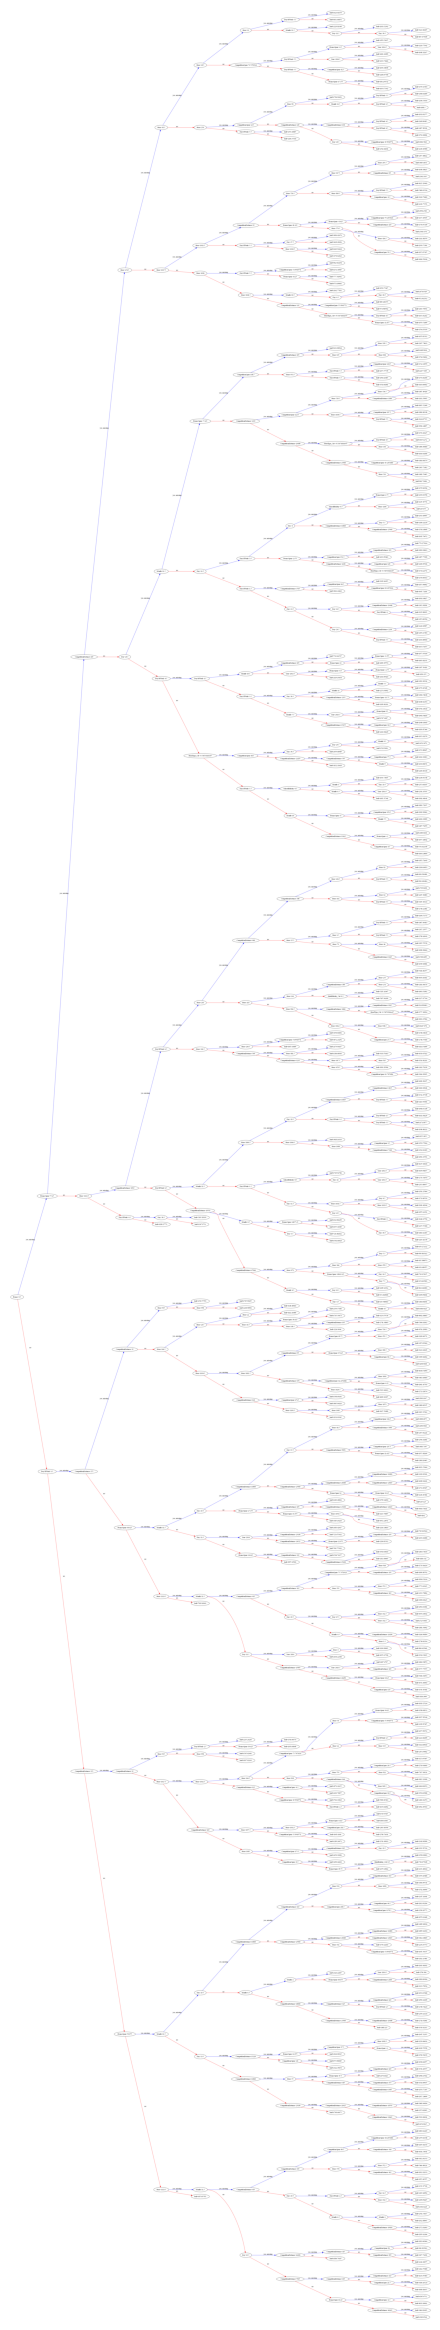

In [76]:
plot_tree(xgboost,rankdir='LR',num_trees=0)